#Домашняя работа № 3

##Немова Ольга


Начнем с прочитывания всех файлов и их последовательной визуализации.

In [ ]:
pip install bootstrapped

  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13954 sha256=b6d352d98f5b87189877d46d7c74879443a3392e903e5b2967de14cfe93593a3
  Stored in directory: /root/.cache/pip/wheels/15/55/6a/9a722f067ac4c3dfab359ed2ec7906b9cc6649156d9886bd59
Successfully built bootstrapped


In [ ]:
from bootstrapped import bootstrap as bs

In [ ]:
from time import time
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import f_oneway
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower
from scipy.stats import levene
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare 
from bootstrapped import stats_functions as bs_stats

In [ ]:
df_bybucket = pd.read_csv('hw_abt_2_bybucket.csv', sep= '\t')
df_byuser = pd.read_csv('hw_abt_2_byuser.csv', sep= '\t')

In [ ]:
df_bybucket

group_id  metric_value  users  visits  churn_users  churn_visits
0          1   1875345.000    155    1419          151          2207
1          2   1662237.000    138    1320          127          1853
2          3   1784372.000    128    1281          159          2032
3          4   1876826.000    163    1644          168          2172
4          5   1913180.000    156    1675          174          2273
5          6   1733079.000    144    1509          141          2009
6          7   1864555.000    151    1481          161          2139
7          8   2029143.000    162    1533          153          2299
8          9   2047289.536    143    1424          242          2191
9         10   2228154.648    179    1803          265          2518
10        11   1876015.920    150    1448          226          2062
11        12   2102859.224    149    1339          261          2257
12        13   2079287.344    155    1240          257          2248
13        14   2127954.032    166    1397          256          2215
14        15   1887384.920    161    1488          224          2015
15        16   2082370.200    159    1469          273          2287

In [ ]:
df_byuser

Unnamed: 0  group_id  metric_value  ...  churn_users  churn_visits  group
0              0         8      6630.000  ...            0             8      A
1              1        13      6933.976  ...            1             6      B
2              2        10      8261.976  ...            1             8      B
3              3         4      5522.000  ...            1             7      A
4              4        16      5075.976  ...            0             8      B
...          ...       ...           ...  ...          ...           ...    ...
4995        4995         6      3666.000  ...            1             5      A
4996        4996        12      6464.976  ...            1             8      B
4997        4997         1      4335.000  ...            0             8      A
4998        4998        13      6307.976  ...            1             8      B
4999        4999         2      5051.000  ...            1             8      A

[5000 rows x 8 columns]

In [ ]:
DAU = 500000 #число уникальных пользователей в день (daily active users)
WAU = 850000 #число уникальных пользователей в неделю (weekly active users)
AUDIENCE = 1500000 #аудитория из около 1 500 000 не уходящих в отток посетителей

In [ ]:
users_A = df_byuser[df_byuser['group'] == 'A']
users_B = df_byuser[df_byuser['group'] == 'B']

#Bootstrap
Проведем бутстраппацию для выборок на основе их среднего и посмотрим на распредления, как они изменятся. Если распредления стали больше походить на нормальное, значит, Bootstrap сработал правильно.

In [ ]:
bs_data_a = bs.bootstrap(users_A.groupby(users_A['group_id']).metric_value.mean().values, stat_func=bs_stats.mean, num_iterations=5000,
                         iteration_batch_size=16, return_distribution=True)
bs_data_b = bs.bootstrap(users_B.groupby(users_B['group_id']).metric_value.mean().values, stat_func=bs_stats.mean, num_iterations=5000,
                         iteration_batch_size=16, return_distribution=True)

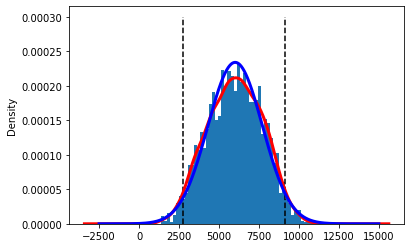

In [ ]:
pd.Series(np.array(users_A['metric_value'])).plot.hist(bins = 50, density=True)
pd.Series(np.array(users_A['metric_value'])).plot.kde(color = 'r', lw=3)
LL_b = np.quantile(np.array(users_A['metric_value']), 0.025)
plt.vlines(LL_b,ymin = 0, ymax = 0.0003,linestyle = '--')
LL_a = np.quantile(np.array(users_A['metric_value']), 0.975)
plt.vlines(LL_a,ymin = 0, ymax = 0.0003,linestyle = '--')

meanA = np.mean(np.array(users_A['metric_value'])) 
varA = np.var(np.array(users_A['metric_value'])) 
norm_rv = sts.norm(loc = meanA, scale =np.sqrt(varA)) 

x = np.linspace(-2500,15000,1000) 
y = norm_rv.pdf(x) 
plt.plot(x,y,lw=3, color = 'b')

plt.show()

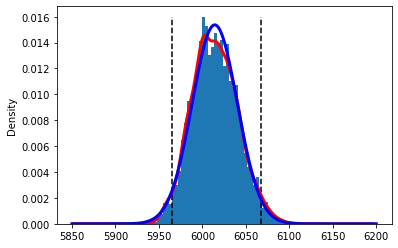

In [ ]:
plt.figsize = (10,15)
pd.Series(np.array(bs_data_a)).plot.hist(bins = 50, density=True)
pd.Series(np.array(bs_data_a)).plot.kde(color = 'r', lw=3)
LL_b = np.quantile(bs_data_a, 0.025)
plt.vlines(LL_b,ymin = 0, ymax = 0.016,linestyle = '--')
LL_a = np.quantile(bs_data_a, 0.975)
plt.vlines(LL_a,ymin = 0, ymax = 0.016,linestyle = '--')

meanA = np.mean(np.array(bs_data_a)) 
varA = np.var(np.array(bs_data_a)) 
norm_rv = sts.norm(loc = meanA, scale =np.sqrt(varA)) 

x = np.linspace(5850, 6200,1000) 
y = norm_rv.pdf(x)
plt.plot(x,y,lw=3, color = 'b')

plt.show()

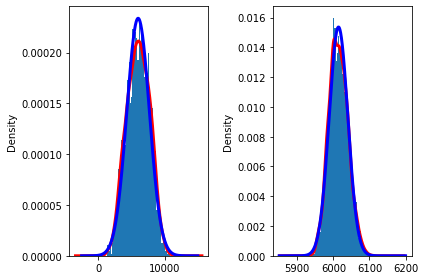

In [ ]:
plt.subplot(1, 2, 1)
pd.Series(np.array(users_A['metric_value'])).plot.hist(bins = 50, density=True)
pd.Series(np.array(users_A['metric_value'])).plot.kde(color = 'r', lw=3)

meanA = np.mean(np.array(users_A['metric_value'])) 
varA = np.var(np.array(users_A['metric_value'])) 
norm_rv = sts.norm(loc = meanA, scale =np.sqrt(varA)) 

x = np.linspace(-2500,15000,1000) 
y = norm_rv.pdf(x) 
plt.plot(x,y,lw=3, color = 'b')
plt.subplot(1, 2, 2)
pd.Series(np.array(bs_data_a)).plot.hist(bins = 50, density=True)
pd.Series(np.array(bs_data_a)).plot.kde(color = 'r', lw=3)

meanA = np.mean(np.array(bs_data_a)) 
varA = np.var(np.array(bs_data_a)) 
norm_rv = sts.norm(loc = meanA, scale =np.sqrt(varA)) 

x = np.linspace(5850, 6200,1000) 
y = norm_rv.pdf(x)
plt.plot(x,y,lw=3, color = 'b')
plt.tight_layout()

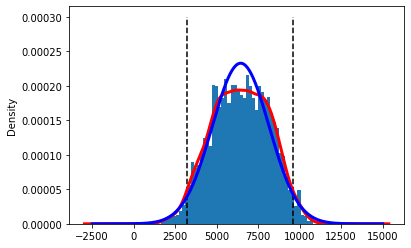

In [ ]:
pd.Series(np.array(users_B['metric_value'])).plot.hist(bins = 50, density=True)
pd.Series(np.array(users_B['metric_value'])).plot.kde(color = 'r', lw=3)
LL_b = np.quantile(np.array(users_B['metric_value']), 0.025)
plt.vlines(LL_b,ymin = 0, ymax = 0.0003,linestyle = '--')
LL_a = np.quantile(np.array(users_B['metric_value']), 0.975)
plt.vlines(LL_a,ymin = 0, ymax = 0.0003,linestyle = '--')

meanB = np.mean(np.array(users_B['metric_value'])) 
varB = np.var(np.array(users_B['metric_value'])) 
norm_rv = sts.norm(loc = meanB, scale =np.sqrt(varB)) 

x = np.linspace(-2500,15000,1000) 
y = norm_rv.pdf(x) 
plt.plot(x,y,lw=3, color = 'b')

plt.show()

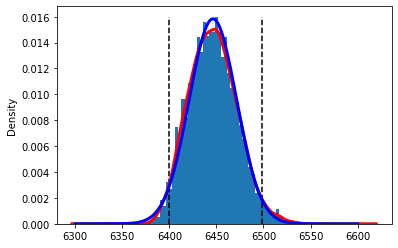

In [ ]:
plt.figsize = (10,15)
pd.Series(np.array(bs_data_b)).plot.hist(bins = 50, density=True)
pd.Series(np.array(bs_data_b)).plot.kde(color = 'r', lw=3)
LL_b = np.quantile(bs_data_b, 0.025)
plt.vlines(LL_b,ymin = 0, ymax = 0.016,linestyle = '--')
LL_a = np.quantile(bs_data_b, 0.975)
plt.vlines(LL_a,ymin = 0, ymax = 0.016,linestyle = '--')

meanB = np.mean(np.array(bs_data_b)) 
varB = np.var(np.array(bs_data_b)) 
norm_rv = sts.norm(loc = meanB, scale =np.sqrt(varB)) 

x = np.linspace(6300, 6600,1000) 
y = norm_rv.pdf(x)
plt.plot(x,y,lw=3, color = 'b')
plt.show()

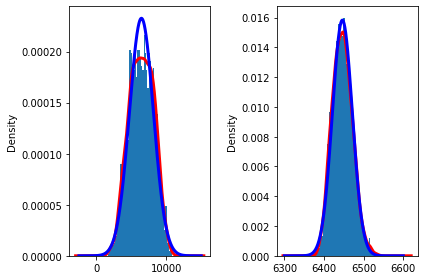

In [ ]:
plt.subplot(1, 2, 1)
pd.Series(np.array(users_B['metric_value'])).plot.hist(bins = 50, density=True)
pd.Series(np.array(users_B['metric_value'])).plot.kde(color = 'r', lw=3)

meanB = np.mean(np.array(users_B['metric_value'])) 
varB = np.var(np.array(users_B['metric_value'])) 
norm_rv = sts.norm(loc = meanB, scale =np.sqrt(varB)) 

x = np.linspace(-2500,15000,1000) 
y = norm_rv.pdf(x) 
plt.plot(x,y,lw=3, color = 'b')
plt.subplot(1, 2, 2)
pd.Series(np.array(bs_data_b)).plot.hist(bins = 50, density=True)
pd.Series(np.array(bs_data_b)).plot.kde(color = 'r', lw=3)

meanB = np.mean(np.array(bs_data_b)) 
varB = np.var(np.array(bs_data_b)) 
norm_rv = sts.norm(loc = meanB, scale =np.sqrt(varB)) 

x = np.linspace(6300, 6600,1000) 
y = norm_rv.pdf(x)
plt.plot(x,y,lw=3, color = 'b')
plt.tight_layout()

Вывод: будем считать, что буттструпация выборок прошла успешно, так как и ,правда, распределение метрики стало больше походить на нормальное.

Посторим боксплоты для исходных выборок:

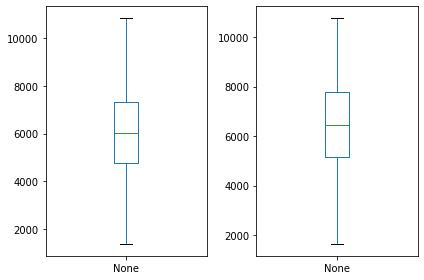

In [ ]:
plt.subplot(1, 2, 1)
pd.Series(np.array(users_A['metric_value'])).plot.box()
plt.subplot(1, 2, 2)
pd.Series(np.array(users_B['metric_value'])).plot.box()
plt.tight_layout()

Постороим боксплоты для бутстраппированных выборок, различие в математическом ожидании стало ещё больше:

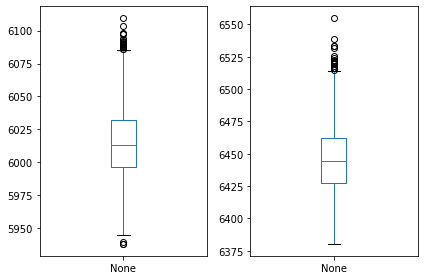

In [ ]:
plt.subplot(1, 2, 1)
pd.Series(np.array(bs_data_a)).plot.box()
plt.subplot(1, 2, 2)
pd.Series(np.array(bs_data_b)).plot.box()
plt.tight_layout()

Так как анализ исходных распределений проводился в прошлом задании, перенесём сюда только некоторые выводы.


* Подтвердили 2 критерия, поэтому: Выборки имеют одинаковую дисперсию.

* Сделаем последний вывод: Распределения не соответствуют Нормальному.

* Сделаем вывод: Отличие распредлений незначительно.

#Анализ полученных распределений
Проведем анализ тех же критериев для получившихся выборок  проверим статзначимость результата.

In [ ]:
alpha = 0.05


def levene_test(df1, df2, p_value = alpha):
    st = levene(df1, df2)
    print('Variances of distributions is {}equal\n'.ёformat( {True:'not ', False:''}[st[1] < p_value]))


levene_test(bs_data_a, bs_data_b)

Variances of distributions is not equal



Получили средний результат, который является для нас нейтральным, что дисперсии выборок отличаются.

In [ ]:
alpha = 0.05

st = ttest_ind(bs_data_a, bs_data_b)
print('Diffs is {}significant\n'.format( {True:'not ', False:''}[st[1] < alpha])) #040

Diffs is not significant



Получили результат, что с текущим уровнем статистической значимости результат является статзначимыми.

Хотя проводив аналогичные расчеты в лоб, то есть используя расчеты не по встроенным функциям, а по формулам, получили, что результат является не статзначимым.

Вопрос: Какое решение все-таки правильное?

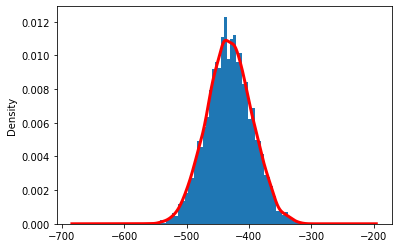

In [ ]:
difference = bs_compare.difference(bs_data_a, bs_data_b)
pd.Series(difference).plot.hist(bins = 50, density=True)
pd.Series(difference).plot.kde(color = 'r', lw=3)

Даже по итоговому распределению видно, что выборки имеют сильное отличие, правильно ли критерии показывают резульат?